# Taller

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

## Punto 1: Función gamma

¿Recuerdan el punto de la luminosidad? Pues ahora sí lo harán como se realiza convencionalmente, que es utilizando una función gamma. Utilice una función gamma tal que se disminuya la iluminación de la imagen. El resultado esperado son 4 imagenes: la imagen original y 3 imagenes con la aplicación de la función gamma.

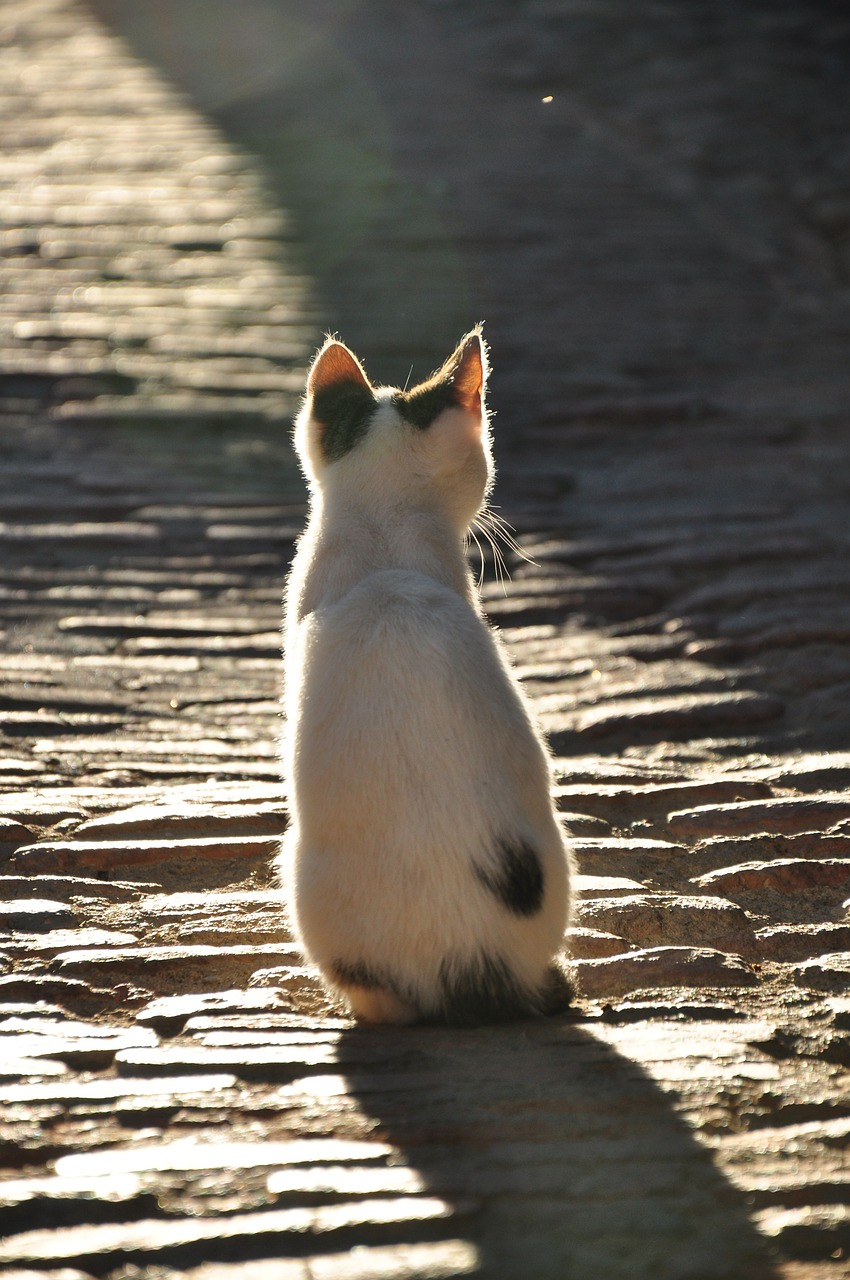

In [2]:
Image("res/Punto2/miau.jpg")

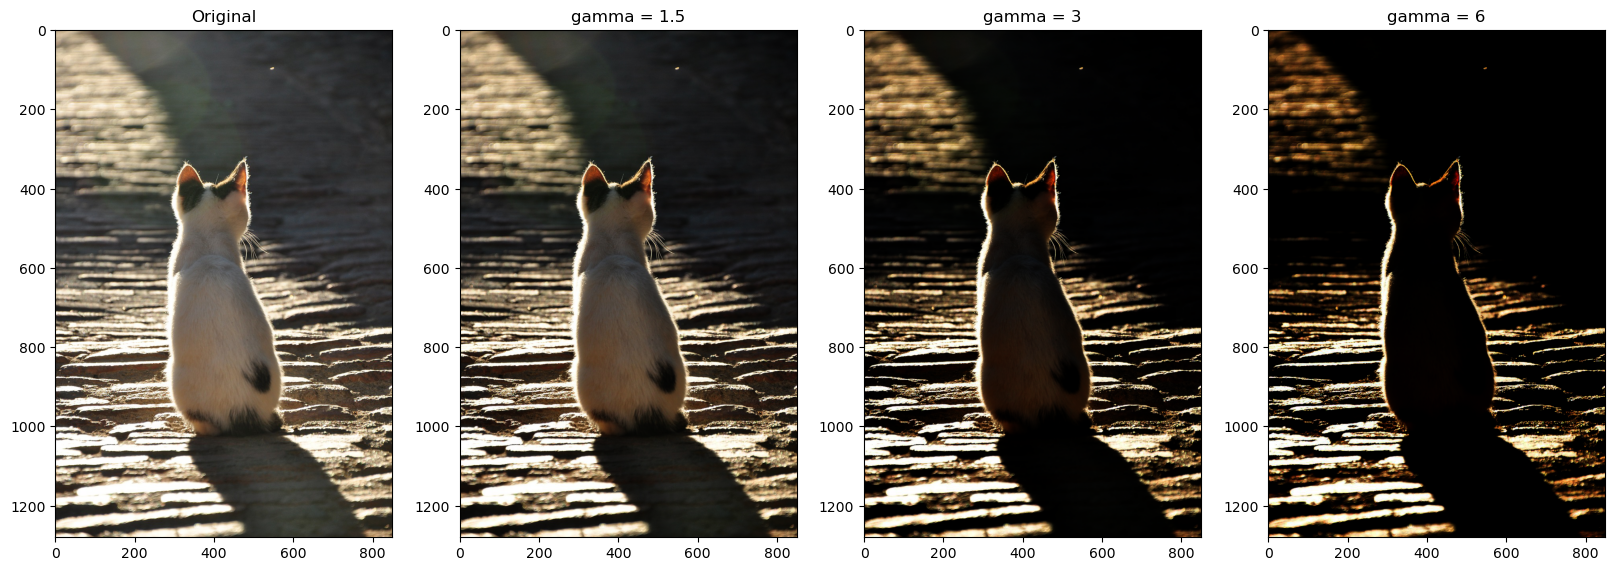

In [3]:
# Definición de la función para aplicar la función gamma
def apply_gamma(img, a, gamma):
    img_copy = img.copy().astype(np.float32)/255.0
    new_img = cv2.pow(img_copy, gamma)
    new_img = cv2.multiply(cv2.multiply(new_img, a), 255)
    return new_img.astype(np.uint8)

# Lectura de la imagen
img_gato = cv2.cvtColor(cv2.imread("res/Punto2/miau.jpg"), cv2.COLOR_BGR2RGB)

# Lista de parámetros gamma e imágenes
gamma_list = [1.5, 3, 6]
imgs = [img_gato]

# Iteramos sobre los valores de gamma para crear las imágenes y anexarlas
for i in range(len(gamma_list)):
        img = apply_gamma(img_gato,1,gamma_list[i])
        imgs.append(img)

# Generación de las gráficas iterando
names_list = ["Original","gamma = 1.5","gamma = 3","gamma = 6"]
fig, axs = plt.subplots(1,4, figsize=(20,20))
for i in range(4):
        axs[i].imshow(imgs[i])
        axs[i].set_title(names_list[i])

## Punto 2: Ecualización

Ya la normalización la ejecutaron en el examen, es momento de pasar a la ecualización. Deberá de realizar una ecualización uniforme sobre la mandala (es opcional si quiere utilizar otro tipo de distribución). El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

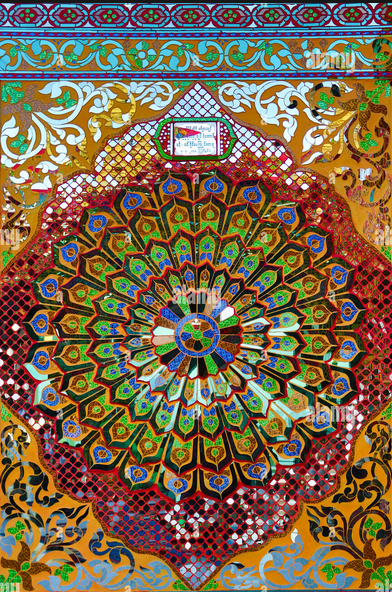

In [4]:
Image("res/Punto3/mandala.png")

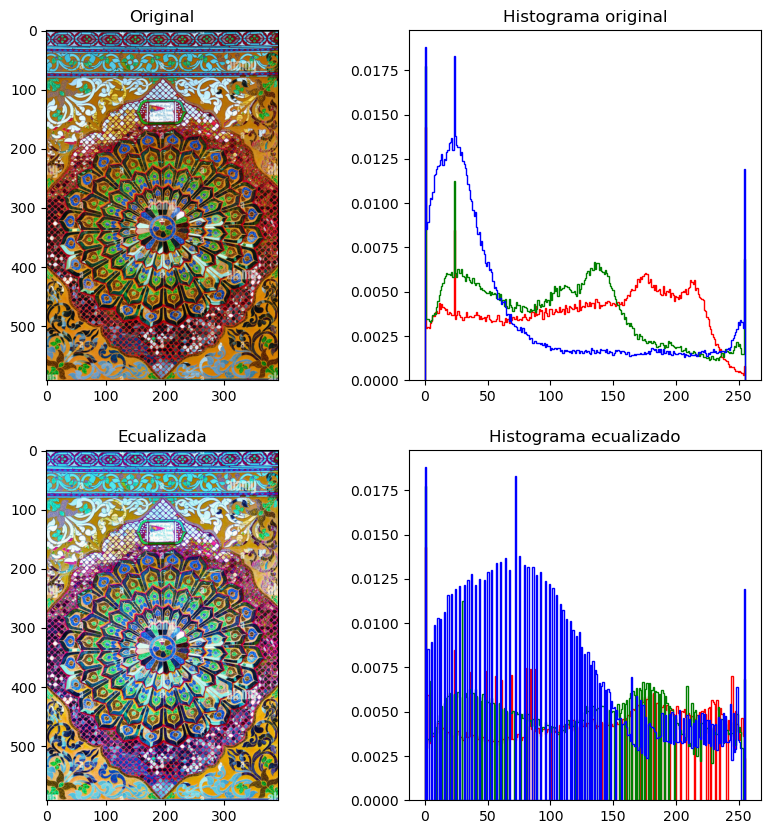

In [5]:
# Creamos una función que permita hacer la ecualización del histograma de una imagen en cada canal
def equalize_hist(img):
    img_copy = img.copy()
    for i in range(3):
        img_copy[:,:,i] = cv2.equalizeHist(img[:,:,i])
    return img_copy

# Lectura de la imagen
img_mandala = cv2.cvtColor(cv2.imread("res/Punto3/mandala.png"), cv2.COLOR_BGR2RGB)

# Ecualización del histograma de la imagen
img_mandala_eq = equalize_hist(img_mandala)
# Lista de colores
colors = ['r','g','b']

# Generación de las gráficas
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].imshow(img_mandala)
axes[0][0].set_title("Original")
for i in range(3):
    axes[0][1].hist(img_mandala[:,:,i].ravel(), histtype = 'step', bins=256,
                            range=(0, 255), density=True, color=colors[i])
axes[0][1].set_title("Histograma original")

axes[1][0].imshow(img_mandala_eq)
axes[1][0].set_title("Ecualizada")
for i in range(3):
    axes[1][1].hist(img_mandala_eq[:,:,i].ravel(), histtype = 'step', bins=256,
                            range=(0, 255), density=True, color=colors[i])
axes[1][1].set_title("Histograma ecualizado");

## Punto 3: Utilizando otras funciones no lineales

Debe de realizar la siguiente función:
<br>
$
 f(g) = \left(0.5 \cdot \log\left(1 + \frac{g}{255}\right) + 0.1 \cdot \left(\log\left(1 + \frac{g}{255}\right)\right)^2\right) \cdot 255 
$
<br>
El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

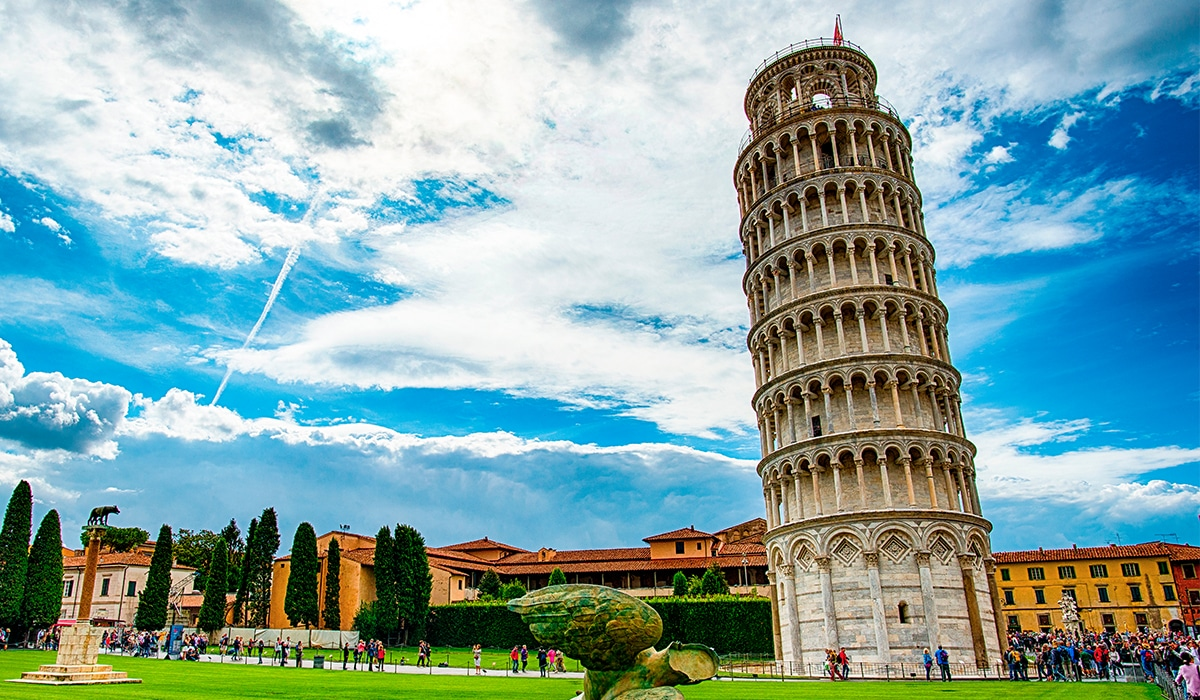

In [6]:
Image("res/Punto4/pisa.jpg")

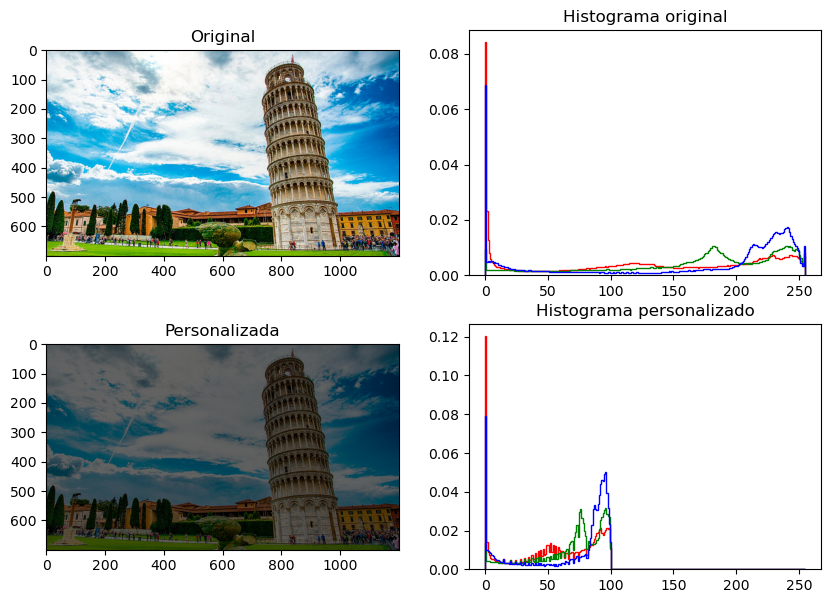

In [7]:
# Definición de la función para aplicar la función especficada
def apply_custom_function(img):
    img_copy = img.copy().astype(np.float32)
    img_copy = (0.5*np.log(1 + img_copy/255.0) + 
                             0.1*(np.log(1 + img_copy/255.0)**2))*255.0
    img_copy = np.clip(img_copy, 0, 255)
    return img_copy.astype(np.uint8)

# Lectura de la imagen
img_pisa = cv2.cvtColor(cv2.imread("res/Punto4/pisa.jpg"), cv2.COLOR_BGR2RGB)
img_pisa_custom = apply_custom_function(img_pisa)

# Lista con los colores
colors = ['r','g','b']

# Generación del gráfico
fig, axes = plt.subplots(2,2, figsize=(10,7))
axes[0][0].imshow(img_pisa)
axes[0][0].set_title("Original")
for i in range(3):
    axes[0][1].hist(img_pisa[:,:,i].ravel(), histtype = 'step', bins=256,
                            range=(0, 255), density=True, color=colors[i])
axes[0][1].set_title("Histograma original")

axes[1][0].imshow(img_pisa_custom)
axes[1][0].set_title("Personalizada")
for i in range(3):
    axes[1][1].hist(img_pisa_custom[:,:,i].ravel(), histtype = 'step', bins=256,
                            range=(0, 255), density=True, color=colors[i])
axes[1][1].set_title("Histograma personalizado");